In [358]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [1]:
import csv
import numpy as np

def read_csv_into_2d_list(file_name):
    data_2d_list = []
    with open(file_name, newline='') as f:
        csvreader = csv.reader(f)
        for row in csvreader:
            data_2d_list.append(row)
    return data_2d_list

mnist_data = read_csv_into_2d_list("mnist_train.csv")
print("Read data, Number of images in the dataset: ", len(mnist_data))

trainAmount = min(len(mnist_data), 10000)

X = np.zeros((trainAmount, 784), dtype=np.float32)
Y = np.zeros((trainAmount, 10), dtype=np.float32)

X_test = np.zeros((1000, 784), dtype=np.float32)
Y_test = np.zeros((1000, 10), dtype=np.float32)

for i in range(0, trainAmount + 1000):
    if i < trainAmount:
        for j in range(0, 784):
            X[i][j] = float(mnist_data[i][j+1]) / 255.0
        Y[i][int(float(mnist_data[i][0]))] = 1.0
    else:
        for j in range(0, 784):
            X_test[i - trainAmount][j] = float(mnist_data[i][j+1]) / 255.0
        Y_test[i - trainAmount][int(float(mnist_data[i][0]))] = 1.0


X.shape, Y.shape, X_test.shape, Y_test.shape


Read data, Number of images in the dataset:  50559


((10000, 784), (10000, 10), (1000, 784), (1000, 10))

In [3]:
import pandas as pd #Alternative way to read data using pandas
df = pd.read_csv("mnist_train.csv")
mnist_data = df.values.tolist()
print("Read data, Number of images in the dataset: ", len(mnist_data))

Read data, Number of images in the dataset:  50558


In [374]:
X.shape, Y.shape

((10000, 784), (10000, 10))

In [375]:
import torch
import torch.nn.functional as F
import numpy as np

W1 = np.random.rand(trainAmount, 784) - 0.5
b1 = np.random.rand(trainAmount, 1) - 0.5
W2 = np.random.rand(10, trainAmount) - 0.5
b2 = np.random.rand(trainAmount, 1) - 0.5

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def ReLU_deriv(Z):
    return Z > 0

In [376]:
#forward
Z1 = np.dot(X, W1.T) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(A1, W2.T) + b2
A2 = softmax(Z2)

In [389]:
#backward
dZ2 = A2 - Y
dW2 = 1 / m * dZ2.T.dot(A1.T)
db2 = 1 / m * np.sum(dZ2)
dZ1 = W2.T.dot(dZ2.T) * ReLU_deriv(Z1)
dW1 = 1 / m * dZ1.dot(X)
db1 = 1 / m * np.sum(dZ1)

In [392]:
W1, b1, W2, b2 = init_params()
for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if i % 10 == 0:
        print("Iteration: ", i)
        predictions = get_predictions(A2)
        print(get_accuracy(predictions, Y))

NameError: name 'iterations' is not defined

In [390]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [391]:
W1, b1, W2, b2 = gradient_descent(X, Y, 0.10, 500)

ValueError: shapes (10000,784) and (10000,784) not aligned: 784 (dim 1) != 10000 (dim 0)

In [ ]:
# Test on last 1000 images
correct = 0
for n in range(X.shape[0] - 1000, X.shape[0]):
    x = torch.matmul(X[n], W) + b
    if torch.argmax(x) == torch.argmax(Y[n]):
        correct += 1

test_accuracy = correct / 1000
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.089


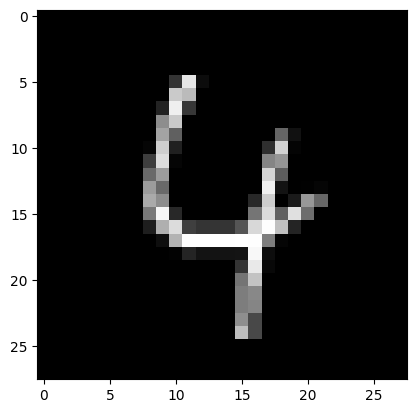

Label: tensor(4)
Output: tensor(4)


In [ ]:
#plot a random image, and the corresponding label
import matplotlib.pyplot as plt
import random

n = random.randint(0, X.shape[0])
plt.imshow(X[n].view(28, 28), cmap='gray')
plt.show()
print("Label:", torch.argmax(Y[n]))

#forward and print the output
x = torch.matmul(X[n], W) + b
print("Output:", torch.argmax(x))

In [731]:
#initialize
def relu(x):
    return torch.max(torch.zeros(x.size()), x)

def softmax(x):
    return torch.exp(x) / torch.sum(torch.exp(x))

Weights1 = torch.randn(784, 10) * 0.0001
Bias1 = torch.randn(1, 10) * 0.01
Weights2 = torch.randn(10, 10) * 0.0001
Bias2 = torch.randn(1, 10) * 0.01
X_train = torch.from_numpy(X)
Y_train = torch.from_numpy(Y)

mini_batch_size = 10

for i in range(4000):
    #get a random mini-batch
    random_indices = torch.randperm(X_train.shape[0])
    random_indices = random_indices[:mini_batch_size]
    X_train_mini_batch = X_train[random_indices]
    Y_train_mini_batch = Y_train[random_indices]

    #forward
    forwardFirstLayer = torch.matmul(X_train_mini_batch, Weights1) + Bias1
    forwardFirstLayer = relu(forwardFirstLayer)
    forwardSecondLayer = torch.matmul(forwardFirstLayer, Weights2) + Bias2
    forwardSecondLayer = relu(forwardSecondLayer)

    #calculate the -logloss
    log_probs = torch.log_softmax(forwardSecondLayer, dim=1)
    logloss = -torch.sum(log_probs * Y_train_mini_batch) / X_train_mini_batch.shape[0]

    #backward
    def relu_deriv(x):
        return torch.where(x > 0, torch.ones_like(x), torch.zeros_like(x))

    def softmax_deriv(x):
        exp_x = torch.exp(x)
        return exp_x / torch.sum(exp_x, dim=1, keepdim=True) * (1 - exp_x / torch.sum(exp_x, dim=1, keepdim=True))

    #calculate the gradients
    dlogloss = (forwardSecondLayer - Y_train_mini_batch) * softmax_deriv(forwardSecondLayer)
    dWeights2 = torch.matmul(forwardFirstLayer.T, dlogloss) / X_train_mini_batch.shape[0]
    dBias2 = torch.sum(dlogloss, 0) / X_train_mini_batch.shape[0]
    dforwardFirstLayer = torch.matmul(dlogloss, Weights2.T) * relu_deriv(forwardFirstLayer)
    dWeights1 = torch.matmul(X_train_mini_batch.T, dforwardFirstLayer) / X_train_mini_batch.shape[0]
    dBias1 = torch.sum(dforwardFirstLayer, 0) / X_train_mini_batch.shape[0]

    lr = 0.2

    #update the weights
    Weights1 = Weights1 - lr * dWeights1
    Bias1 = Bias1 - lr * dBias1
    Weights2 = Weights2 - lr * dWeights2
    Bias2 = Bias2 - lr * dBias2

    if i % 100 == 0:
        print("Iteration: ", i)
        print("Loss: ", logloss)

Iteration:  0
Loss:  tensor(2.3037)
Iteration:  100
Loss:  tensor(2.3016)
Iteration:  200
Loss:  tensor(2.2970)
Iteration:  300
Loss:  tensor(2.3008)
Iteration:  400
Loss:  tensor(2.3029)
Iteration:  500
Loss:  tensor(2.2987)
Iteration:  600
Loss:  tensor(2.2975)
Iteration:  700
Loss:  tensor(2.2872)
Iteration:  800
Loss:  tensor(2.2373)
Iteration:  900
Loss:  tensor(2.1938)
Iteration:  1000
Loss:  tensor(2.2429)
Iteration:  1100
Loss:  tensor(2.1715)
Iteration:  1200
Loss:  tensor(2.0426)
Iteration:  1300
Loss:  tensor(2.1257)
Iteration:  1400
Loss:  tensor(2.0932)
Iteration:  1500
Loss:  tensor(1.9631)
Iteration:  1600
Loss:  tensor(1.9556)
Iteration:  1700
Loss:  tensor(1.8250)
Iteration:  1800
Loss:  tensor(1.8675)
Iteration:  1900
Loss:  tensor(1.8950)
Iteration:  2000
Loss:  tensor(1.7485)
Iteration:  2100
Loss:  tensor(1.8389)
Iteration:  2200
Loss:  tensor(1.9910)
Iteration:  2300
Loss:  tensor(1.8537)
Iteration:  2400
Loss:  tensor(1.8349)
Iteration:  2500
Loss:  tensor(1.8233

In [732]:
#test on 1000 last train images
correct = 0
testImages = torch.from_numpy(X)
anserImages = torch.from_numpy(Y)
for n in range(X.shape[0] - 1000, X.shape[0]):
    forwardFirstLayer = torch.matmul(testImages[n], Weights1) + Bias1
    forwardFirstLayer = relu(forwardFirstLayer)
    forwardSecondLayer = torch.matmul(forwardFirstLayer, Weights2) + Bias2
    if torch.argmax(forwardSecondLayer) == torch.argmax(anserImages[n]):
        correct += 1

test_accuracy = correct / 10
print("Test Accuracy:", test_accuracy)

Test Accuracy: 89.7


In [733]:
#test on 1000 test images
correct = 0
testImages = torch.from_numpy(X_test)
anserImages = torch.from_numpy(Y_test)
for n in range(0, 1000):
    forwardFirstLayer = torch.matmul(testImages[n], Weights1) + Bias1
    forwardFirstLayer = relu(forwardFirstLayer)
    forwardSecondLayer = torch.matmul(forwardFirstLayer, Weights2) + Bias2
    if torch.argmax(forwardSecondLayer) == torch.argmax(anserImages[n]):
        correct += 1

test_accuracy = correct / 10
print("Test Accuracy:", test_accuracy)

Test Accuracy: 88.6
